# CMT218 Data Visualization coursework 
## Cardiff University 2020-2021
#### Student ID 21015647

In [1]:
# Standard imports

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Bar-chart-race imports

import matplotlib.animation as animation
import bar_chart_race as bcr

Uncomment and Install the following if required - to run bar-chart-race:

In [3]:
#pip install bar_chart_race

Then either of these:

In [4]:
#pip install ffmpeg
#conda install ffmpeg

How to install ffmpeg on windows 10:

https://www.youtube.com/watch?v=r1AtmY-RMyQ


https://www.wikihow.com/Install-FFmpeg-on-Windows


Download repositories:

https://www.gyan.dev/ffmpeg/builds/



Please also note - In case of having issues installing the above packages, a .mp4 file of the generated bar-chart-race movie has been included the coursework submission (codec libx264). The renderization should take ~5 minutes..

### Main challenges when facing this dataset. Purpose of visualizations

The data contained in this dataset are aircraft accidents, being the majority of columns of categorical type. In addition to this, the data is extremely segregatted i.e. most of the accidents take place in the US and involve airplane types, this is understandable as these flights compose the majority of air traffic.

The challenge of the below visualizations is to chose one parameter that can show information about the whole set, not just applying filters for convenience. As a result, in the first visualization we will analyze relative frequencies in order to compensate the segreggation. During the second visualization, we will collect the count of accident occurrences per phase of flight and its evolution over time, so in this way we can make use of the time-series index provided in the dataset.

# Visualization 1
## Injury severity per aircraft type

### Motivation

We want to study the proportion of fatal, serious, minor and uninjured victims for each aircraft type.

The scope is to aggregate the number of victims at each degree of injury severity then study the proportions to compare between aircraft types.

As the data is highly segregated (i.e. most of the flights are airplane-type) we will represent the relative number of victims, this is, dividing the figures by the total number of accidents per each aircraft type, in order to create a meaningful visualization.

### Data preparation and clean-up

Load dataframe, perform standard clean-ups. Remove columns not relevant for analysis and get right format for time series.

In [5]:
df_aviation = pd.read_csv('data/aviation.csv')

df_aviation = df_aviation[df_aviation['Investigation.Type'] == 'Accident'] # Only retain relevant data (discard incidents only)

df_aviation.drop(['Event.Id', 'Report.Status'], axis = 1, inplace = True) # Columns not relevant for analysis
df_aviation['Event.Date'].apply(pd.to_datetime) # right format for time series

0       2021-02-16
1       2021-02-15
2       2021-02-13
3       2021-12-02
4       2021-10-02
           ...    
85971   1979-02-08
85972   1977-06-19
85973   1974-08-30
85974   1962-07-19
85975   1948-10-24
Name: Event.Date, Length: 82286, dtype: datetime64[ns]

### Severity per aircraft category

In [6]:
# First group by aircraft type and calculate the total number of injuried people.
df_injuries = df_aviation.groupby('Aircraft.Category').agg('sum')

# Slice dataframe to retain only injuries-related columns.
df_injuries = df_injuries.loc[:, 'Total.Fatal.Injuries' : 'Total.Uninjured']

df_injuries

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Aircraft.Category,,,,
Airplane,14837.0,4488.0,7435.0,103129.0
Balloon,37.0,184.0,139.0,792.0
Blimp,0.0,1.0,2.0,4.0
Glider,93.0,107.0,99.0,327.0
Gyrocraft,22.0,14.0,24.0,48.0
Gyroplane,17.0,12.0,27.0,31.0
Helicopter,1611.0,717.0,1012.0,3196.0
Powered Parachute,7.0,55.0,27.0,19.0
Powered-Lift,0.0,1.0,0.0,2.0


As the data is highly segregated, categories cannot be compared with each other as the majority of accidents involve airplanes o helicopters. We wish to study the relative proportions within each category, then the decision was to create a grid of pie plots so we can compare the distribution between categories:

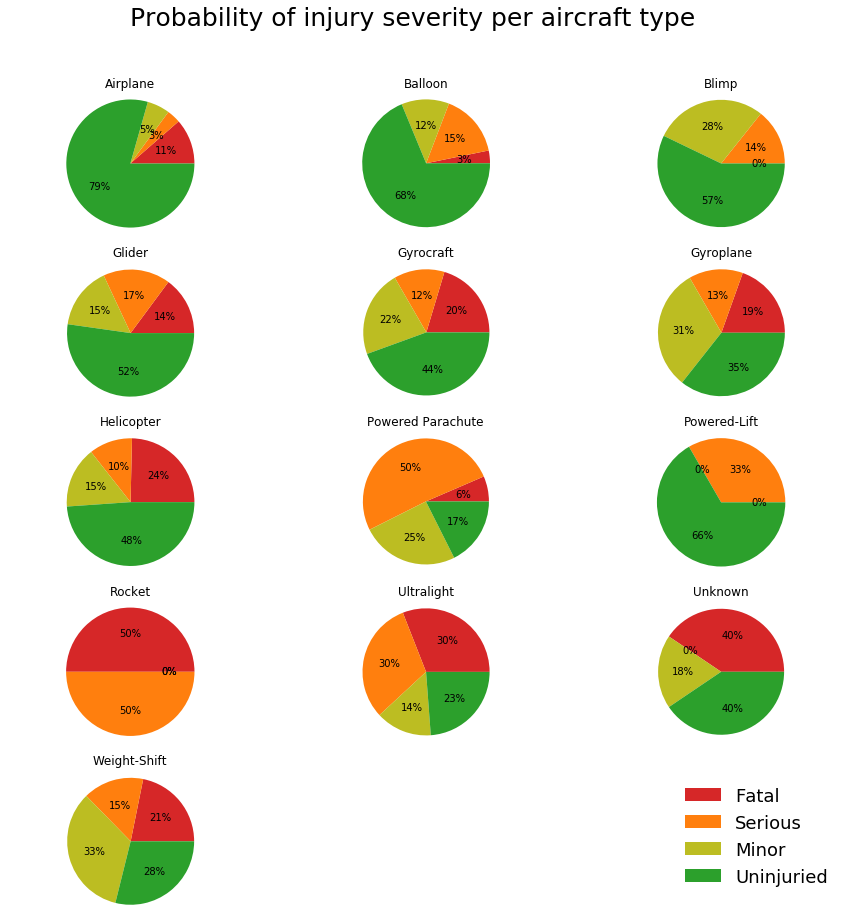

In [7]:
# Create figure

fig = plt.figure(figsize=(15, 15))


# Build a list of axes names, based on the indexes from the df_injuries dataframe:

axes = []

for index in df_injuries.index:
    axes_name = str(index)+'_'+'ax'
    axes.append(axes_name)

# Color set: Color gradient from green to red depending on severity (green: uninjuried, red: fatal)
color_set = ['tab:red','tab:orange','tab:olive','tab:green']
    
# Build a subplot grid:    

for i in range(len(df_injuries)):

    #SUBPLOT GRID

    axes[i] = fig.add_subplot(len(df_injuries), 3 , i+1) # needs i+1 as matplotlib starts counting axes from 1 not 0
    
    fig.set_figheight(40)
    fig.set_figwidth(15)
    
    # Extract values to be fed into the plt.pie call:
    values = df_injuries.loc[df_injuries.index[i], :]
    
    # Decided not to use labes on each subplot, as the information would be redundant. Colors and legend are enough to
    # provide clear description:
    
    axes[i].pie(values, labels= None, autopct='%1d%%', colors = color_set)
    axes[i].axis('equal')
    
    # Subplot title - aircraft type:
    axes[i].set_title(df_injuries.index[i])
    
    
# Labelling for main plot - grid-plot array:
        
fig.suptitle("Probability of injury severity per aircraft type", fontsize=25, y= 0.91)

plt.legend(['Fatal', 'Serious', 'Minor','Uninjuried'], loc = 'best', bbox_to_anchor=(3.4, 1), frameon = False, fontsize=18)

plt.show()


plt.close('all')


Personal comments and conclusions:

The scope was to perform a visualization that can represent the whole dataset, we chose the proportion of injury severity type for each aircraft type, so we can compare. 

As the data is extremely segregated, we visualize the proportions individually, without taking into account the raw occurrences. Decision was made to create a grid of pie plots, in this way we can compare the relative amount of injuries.


Pros:

The above visualization helps the viewer to understand the probabilities of suffering a serious of fatal injury depending of the aircraft he may be boarding, as the lenght of the bar plots can be easily compared. For example, looking at the data, we can say that when involved in an airplane or balloon incident, the probabilities of suffering a fatal or serious injury are low compared with the chances of getting away uninjuried. On the contrary, being involved in a rocked accident will result more catastrophic as there are no records of people resulting uninjuried in these kind of accidents.

Cons:

The visualization does not take into account the "clustering" of occurrences, i.e. fatal incidents where the aircraft crashes and all passangers die, compared with lucky accidents where all passangers get away uninjuried. Also it does not take into account the frequency of an accident given an aircraft type.

# Visualization 2
## Evolution of number of accidents per phase of flight


### Motivation

We want to study at which period within the flight (phase of flight) the accidents occur with more frequency. We link the data collection with a time-series index in order to see the evolution through time.

Method: Bar chart race.

Note that during the representation and in order to save computation time, will feed the bar-chart-race engine with every 100th row of the dataframe only.


In [8]:
# Multi-index .groupby['Event.Date', 'Broad.phase.of.flight']
df_aviation_dates = df_aviation[['Accident.Number', 'Event.Date', 'Broad.phase.of.flight']].groupby(['Event.Date', 'Broad.phase.of.flight']).agg('count')

# To transform multi-index into columns
df_aviation_dates.reset_index(inplace=True)

df_aviation_dates.head(10)

,Event.Date,Broad.phase.of.flight,Accident.Number
0,01/01/1982,Approach,1
1,01/01/1982,Cruise,1
2,01/01/1982,Landing,2
3,01/01/1982,Takeoff,1
4,01/01/1983,Approach,2
5,01/01/1983,Landing,3
6,01/01/1983,Takeoff,1
7,01/01/1984,Cruise,1
8,01/01/1984,Descent,1
9,01/01/1984,Landing,2


Pivot-chart: We need to un-stack the categories from Broad.phase.of.flight into columns to represent the bars during the bar chart race: 

In [9]:
# Create pivot chart
df_aviation_pivot = df_aviation_dates.pivot_table(index = 'Event.Date' , columns = 'Broad.phase.of.flight').fillna(0)

# Reset the index
df_aviation_pivot.columns = df_aviation_pivot.columns.droplevel(0)



# We need to change the date format to make it compatible with the bar_chart_race module:

def change_date_format(date_string):
    day, month, year = date_string.split(r'/')
    return '-'.join([year, month, day])

# Create new index:
new_index = []

# Transform into the new format:
for index in df_aviation_pivot.index:
    new_index_item = change_date_format(index)
    new_index.append(new_index_item)

# Substitue:
df_aviation_pivot.index = new_index




# Need to re-order the dataframe sorting by time-series due to the index-reset earlier:
df_aviation_pivot.sort_index(inplace = True)


# To get the cumsum:
df_aviation_pivot_cumsum = df_aviation_pivot.cumsum()

df_aviation_pivot_cumsum.head(20)

Broad.phase.of.flight,Approach,Climb,Cruise,Descent,Go-around,Landing,Maneuvering,Other,Standing,Takeoff,Taxi,Unknown
1948-10-24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1962-07-19,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1974-08-30,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1977-06-19,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1979-08-02,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1979-09-17,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1981-08-01,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1982-01-01,2.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0
1982-01-02,4.0,1.0,8.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,2.0,3.0
1982-01-03,7.0,1.0,8.0,2.0,0.0,3.0,1.0,0.0,0.0,4.0,2.0,3.0


### Execute bar-chart-race:

In [10]:
Writer = animation.FFMpegWriter(fps=15, codec='libx264') # Or 
Writer = animation.FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=900)

bcr.bar_chart_race(df = df_aviation_pivot_cumsum.iloc[::100, :], title = "Accidents per phase of flight")

Personal comments and conclusions:

We can clearly appreciate that the majority of accidents occurr at either landing or takeoff phases. One may have expected this result as these are the most critical maneuvers while operating a flight. 
Contrary to the popular belief that says that it is more likely to have an accident during takeoff (because of the fuel tanks being full), the data shows that this category rests in the second place. However more exhaust analysis would be needed, for example filtering by aircraft type.

During the visualization we can also see that the proportion of accidents per phase remains constant throughout the whole time-series. As the data from this dataset contains entries starting from the late 90's, we could comment that the new navigation-assistant technologies have not have an impact in reducing the number of accidents during time.


Pros:

We can see a time-series comparison where the data.

Cons:

Unfortunatelly we don't see any step change or trend. Proportion between categories is stable.

# Final conclusions

A better cherry-picked slice of the dataset could have been taken in order to obtain a more useful visualization, however it was intended to perform an study that could gather as much data as possible. The above visualizations cope with a large slice of the data and allows the user to perform a fair type-to-type comparison in between different categories. 